In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [135]:
colname = ['ID','title','url','publisher','cat','story','hostname','timestamp']

In [136]:
a = pd.read_csv('NewsAggregatorDataset/2pageSessions.csv',delimiter = '\t',names = colname)
b = pd.read_csv('NewsAggregatorDataset/newsCorpora.csv',delimiter = '\t',names= colname)

In [137]:
publishers = ['Huffington Post','Reuters','Businessweek','Daily Mail','Contactmusic.com']

In [193]:
c = b[b['publisher'].isin(publishers)]
c = c.sample(frac=1)

In [30]:
#train[2].iloc[8].split('/')
#train[2].iloc[14].split('/')

In [201]:
# not in use
midashi = []
for i in range(len(c)):
    where = c['publisher'].iloc[i]
    if where == 'Reuters':
        midashi.append([c['url'].iloc[i].split('/')[-1].split('-')[:-1]])
    elif where == 'Huffington Post':
        midashi.append([c['url'].iloc[i].split('/')[-1].split('_')[0].split('-')])
    elif where == 'Contactmusic.com':
        midashi.append([c['url'].iloc[i].split('/')[-1].split('_')[0].split('-')])
    elif where == 'Daily Mail':
        midashi.append([c['url'].iloc[i].split('/')[-1].split('.')[0].split('-')])
    else:
        midashi.append([c['url'].iloc[i].split('/')[-1].split('-')])
genre = []
for i in range(len(c)):
    g = c['url'].iloc[i].split('/')[3]
    if '-' in g:
        genre.append('null')
    elif '2' in g:
        genre.append('null')
    elif g == 'jamesnichols':
        genre.append('null')
    else:
        genre.append(g)
np.unique(genre)
#c['title'] = c['title'].apply(lambda x : x.split(' '))
#c['genre'] = genre
#c['midashi'] = midashi
#midashilen = []
for i in c['title']:
    midashilen.append(len(i))
#c['midashilen'] = midashilen

In [202]:
c_X,c_y = c.drop('cat',axis=1),c['cat']
train_X,valid_X,test_X = np.split(c_X,[int(0.8*len(c_X)),int(0.9*len(c_X))])
train_y,valid_y,test_y = np.split(c_y,[int(0.8*len(c_y)),int(0.9*len(c_y))])
np.savetxt('NewsAggregatorDataset/train.txt',train,fmt='%s')
np.savetxt('NewsAggregatorDataset/valid.txt',valid,fmt='%s')
np.savetxt('NewsAggregatorDataset/test.txt',test,fmt='%s')

In [208]:
vectorizer = CountVectorizer()
lgr = LogisticRegression()
xtrain = vectorizer.fit_transform(train_X['title'])
xvalid = vectorizer.transform(valid_X['title'])
xtest = vectorizer.transform(test_X['title'])

In [209]:
lgr.fit(xtrain,train_y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [310]:
def predcat(testdata):
    probs = lgr.predict_proba(testdata)
    pbs = [max(p) for p in probs]
    cats = lgr.predict(testdata)
    output = pd.DataFrame({'Category':cats,'Probability':pbs})
    return output
predcat(xtest)

In [319]:
print('test score:','{:.3}%'.format(lgr.score(xtest,test_y)))
print('train score','{:.3}%'.format(lgr.score(xtrain,train_y)))
print('validate score','{:.3}%'.format(lgr.score(xvalid,valid_y)))

test score: 0.918%
train score 0.996%
validate score 0.906%


In [341]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [335]:
print(confusion_matrix(train_y,predcat(xtrain)['Category'],labels=['b','e','m','t']))
print('\n')
print(confusion_matrix(valid_y,predcat(xvalid)['Category'],labels=['b','e','m','t']))

[[4441    1    0    8]
 [   7 4245    1    2]
 [   2    2  736    0]
 [  13    3    0 1211]]


[[527  19   6  10]
 [ 13 500   1   6]
 [  6  17  66   2]
 [ 23  18   5 115]]


In [366]:
print('Precision Score',['{:.3%}'.format(a) for a in precision_score(valid_y,predcat(xvalid)['Category'],average=None)]
     ,' Micro:', '{:.3%}'.format(precision_score(valid_y,predcat(xvalid)['Category'],average='micro')),
     ' Macro','{:.3%}'.format(precision_score(valid_y,predcat(xvalid)['Category'],average='macro')))
print('Recall Score     ',['{:.3%}'.format(a) for a in recall_score(valid_y,predcat(xvalid)['Category'],average=None)]
     ,' Micro:', '{:.3%}'.format(recall_score(valid_y,predcat(xvalid)['Category'],average='micro')),
     ' Macro','{:.3%}'.format(recall_score(valid_y,predcat(xvalid)['Category'],average='macro')))
print('F1 Score           ',['{:.3%}'.format(a) for a in f1_score(valid_y,predcat(xvalid)['Category'],average=None)]
     ,' Micro:', '{:.3%}'.format(f1_score(valid_y,predcat(xvalid)['Category'],average='micro')),
     ' Macro','{:.3%}'.format(f1_score(valid_y,predcat(xvalid)['Category'],average='macro')))

Precision Score ['92.619%', '90.253%', '84.615%', '86.466%']  Micro: 90.555%  Macro 88.488%
Recall Score      ['93.772%', '96.154%', '72.527%', '71.429%']  Micro: 90.555%  Macro 83.471%
F1 Score            ['93.192%', '93.110%', '78.107%', '78.231%']  Micro: 90.555%  Macro 85.660%


In [369]:
lgr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [377]:
lgr.densify()

LogisticRegression()

In [378]:
lgr.coef_

array([[ 1.72921033e-01, -1.42234507e-05,  2.55250846e-02, ...,
        -5.09248491e-02, -9.20176239e-02, -1.06400093e-03],
       [-9.95759824e-02,  3.60292594e-05, -1.80129233e-02, ...,
         1.10729005e-01,  1.08635749e-01,  5.85092695e-03],
       [-3.99780339e-02, -1.08918105e-05, -4.31929934e-03, ...,
        -2.96631659e-02, -7.88304119e-03, -1.58635544e-03],
       [-3.33670171e-02, -1.09139982e-05, -3.19286198e-03, ...,
        -3.01409898e-02, -8.73508432e-03, -3.20057058e-03]])

In [389]:
dic = {'b':'business', 't':'science and technology', 'e' : 'entertainment', 'm' : 'health'}
names = np.array(vectorizer.get_feature_names())
labels = ['b','t','e','m']
for c,coef in zip(lgr.classes_, lgr.coef_):
    idx = np.argsort(coef)[::-1] #first place is nth coefficient, 2nd place is mth coefficient......
    print(dic[c])
    print(names[idx][:10])
    print(names[idx][:-10][::-1])

business
['bank' 'fed' 'ecb' 'ukraine' 'oil' 'yellen' 'china' 'argentina' 'buy'
 'euro']
['video' 'recalled' 'nintendo' ... 'ecb' 'fed' 'bank']
entertainment
['kardashian' 'chris' 'transformers' 'paul' 'thrones' 'movie' 'miley'
 'cyrus' 'hbo' 'met']
['obamacare' 'ceo' 'prices' ... 'transformers' 'chris' 'kardashian']
health
['ebola' 'cancer' 'fda' 'mers' 'study' 'drug' 'cases' 'cigarettes'
 'doctors' 'health']
['big' 'costs' 'netflix' ... 'fda' 'cancer' 'ebola']
science and technology
['google' 'facebook' 'microsoft' 'climate' 'apple' 'tesla' 'activision'
 'heartbleed' 'nasa' 'gm']
['means' 'grows' 'still' ... 'microsoft' 'facebook' 'google']


In [443]:
def get_scores(cs,slv,cw):
    trainlist = []
    testlist = []
    validlist = []
    for a in cs:
        lgr = LogisticRegression(C=a,solver=slv,class_weight=cw)
        lgr.fit(xtrain,train_y)
        trainlist.append(lgr.score(xtrain,train_y))
        testlist.append(lgr.score(xtest,test_y))
        validlist.append(lgr.score(xvalid,valid_y))
    return trainlist,testlist,validlist

In [424]:
clist = np.logspace(-5,4,10,base=10)
tr,te,va = get_scores(clist)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

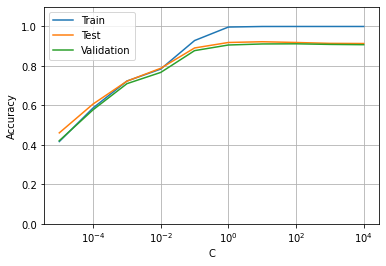

In [431]:
plt.plot(clist,tr,label= 'Train')
plt.plot(clist,te,label = 'Test')
plt.plot(clist,va,label='Validation')
plt.xscale('log')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.ylim(0,1.1)
plt.grid(True)

In [433]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag','saga']
class_weight = [None, 'balanced']

In [453]:
import itertools
a = itertools.product(solvers,class_weight,clist)
scorelist = []
namelist = []
for s,cw,cl in a:
    lgr = LogisticRegression(C=cl,solver=s,class_weight=cw)
    lgr.fit(xtrain,train_y)
    scorelist.append(lgr.score(xtest,test_y))
    namelist.append([s,cw,cl])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which 

In [463]:
print('{:.3}%'.format(scorelist[np.argsort(scorelist)[-1]]),namelist[np.argsort(scorelist)[-1]])

0.925% ['liblinear', None, 100.0]
